In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [260]:
#df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df=pd.read_csv('energydata_complete.csv')

In [261]:
df.shape

(19735, 29)

In [262]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [263]:
# From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and 
# the temperature outside the building (y = T6). What is the R^2 value in two D.P?

simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

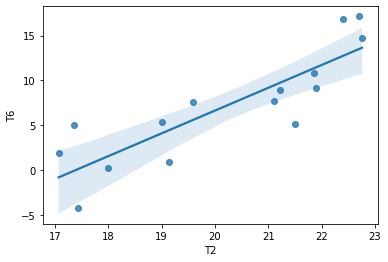

In [264]:
#regression plot
sns.regplot(x="T2", y="T6",data=simple_linear_reg_df)

In [265]:
from sklearn.metrics import r2_score
from scipy import stats

#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(simple_linear_reg_df['T2'],simple_linear_reg_df['T6'])

In [266]:
def linefitline(b):
    return intercept + slope * b

x =  simple_linear_reg_df['T2']
y = simple_linear_reg_df['T6']
line1 = linefitline(x)

In [267]:
r2 = r2_score(y, linefitline(x))
round(r2,2)

0.74

In [268]:
column_names = { 'date': 'date', 'Appliances':'Appliances','lights':'lights',
                'T1':'Temperature in kitchen','RH_1':'Humidity in kitchen',
                'T2':'Temperature in living room','RH_2':'Humidity in living room',
                'T3':'Temperature in laundry room','RH_3':'Humidity in laundry room',
                'T4':'Temperature in office room','RH_4':'Humidity in office room',
                'T5':'Temperature in bathroom','RH_5':'Humidity in bathroom',
                'T6':'Temperature outside the building (north side)','RH_6':'Humidity outside the building (north side)',
                'T7':'Temperature in ironing room','RH_7':'Humidity in ironing room',
                'T8':'Temperature in teenager room 2','RH_8':'Humidity in teenager room 2',
                'T9':'Temperature in parents room','RH_9':'Humidity in parents room',
                'T_out':'Temperature outside (from Chievres weather station)',
                'Press_mm_hg':'Pressure',
                'RH_out':'Humidity outside (from Chievres weather station)','Windspeed':'Windspeed',
                'Visibility':'Visibility','Tdewpoint':'Tdewpoint',
                'rv1':'Random variable 1',
                'rv2':'Random variable 2'              
}

In [269]:
df = df.rename(columns=column_names)

In [270]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [271]:
# remove the columns : date and lights
df = df[[ 'Appliances', 'Temperature in kitchen',
       'Humidity in kitchen', 'Temperature in living room',
       'Humidity in living room', 'Temperature in laundry room',
       'Humidity in laundry room', 'Temperature in office room',
       'Humidity in office room', 'Temperature in bathroom',
       'Humidity in bathroom', 'Temperature outside the building (north side)',
       'Humidity outside the building (north side)',
       'Temperature in ironing room', 'Humidity in ironing room',
       'Temperature in teenager room 2', 'Humidity in teenager room 2',
       'Temperature in parents room', 'Humidity in parents room', 'Temperature outside (from Chievres weather station)',
       'Pressure', 'Humidity outside (from Chievres weather station)',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Random variable 1',
       'Random variable 2']]

In [272]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [273]:
normalised_df.head()

,Appliances,Temperature in kitchen,Humidity in kitchen,Temperature in living room,Humidity in living room,Temperature in laundry room,Humidity in laundry room,Temperature in office room,Humidity in office room,Temperature in bathroom,...,Temperature in parents room,Humidity in parents room,Temperature outside (from Chievres weather station),Pressure,Humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,Random variable 1,Random variable 2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [274]:
features_df = normalised_df.drop(columns=['Appliances'])
appliance_target = normalised_df['Appliances']

In [275]:
# Now, we split our dataset into the training and testing dataset. 
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, appliance_target , test_size=0.3, random_state=42)

In [276]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

In [277]:
#What is the Mean Absolute Error (in two decimal places)?

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)

round(mae, 2)

0.05

In [278]:
# What is the Residual Sum of Squares (in two decimal places)?
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [279]:
# What is the Root Mean Squared Error (in three decimal places)?
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

round(rmse, 3)

0.088

In [280]:
# What is the Coefficient of Determination (in two decimal places)? 
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.15

In [281]:
cdf = pd.DataFrame(linear_model.coef_, features_df.columns, columns=['Coeff'])
cdf

,Coeff
Temperature in kitchen,-0.003281
Humidity in kitchen,0.553547
Temperature in living room,-0.236178
Humidity in living room,-0.456698
Temperature in laundry room,0.290627
Humidity in laundry room,0.096048
Temperature in office room,0.028981
Humidity in office room,0.026386
Temperature in bathroom,-0.015657
Humidity in bathroom,0.016006


In [282]:
# Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?
print(cdf.min())
print(cdf.max())

Coeff   -0.456698
dtype: float64
Coeff    0.553547
dtype: float64


In [283]:
# Train a ridge regression model with an alpha value of 0.4.
# Is there any change to the root mean squared error (RMSE) when evaluated on the test set?
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)



Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [284]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

round(rmse, 3)

0.088

In [285]:
# Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. 
# How many of the features have non-zero feature weights?
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [286]:
# What is the new RMSE with the Lasso Regression (in 3 decimal places)?  

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

round(rmse, 3)

0.088

In [287]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
    
  weights_df = pd.DataFrame(weights).reset_index()

  weights_df.columns = ['Features', col_name]
    
  weights_df[col_name].round(3)

  return weights_df

In [288]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [289]:
## Merging the dataframes
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [290]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Humidity in living room,-0.456698,-0.411071,-0.000000
1,Temperature outside (from Chievres weather sta...,-0.321860,-0.262172,0.000000
2,Temperature in living room,-0.236178,-0.201397,0.000000
3,Temperature in parents room,-0.189941,-0.188916,-0.000000
4,Humidity in teenager room 2,-0.157595,-0.156830,-0.000110
5,Humidity outside (from Chievres weather station),-0.077671,-0.054724,-0.049557
6,Humidity in ironing room,-0.044614,-0.045977,-0.000000
7,Humidity in parents room,-0.039800,-0.041367,-0.000000
8,Temperature in bathroom,-0.015657,-0.019853,-0.000000
9,Temperature in kitchen,-0.003281,-0.018406,0.000000
